In [2]:
from geomdl import NURBS
from geomdl import BSpline
from geomdl.visualization import VisMPL
from geomdl import multi
import numpy as np
from matplotlib import cm
from clifford.tools.g3c import *
from clifford.tools.g3c.rotor_parameterisation import *
from pyganja import *

Failed to import cef_gui, cef functions will be unavailable


In [7]:
def list_to_CGA(x):
    c = + x[0]*e1 + x[1]*e2 - x[2]*e3
    return up(c)

x = np.linspace(0,1,101)
Bc0 = np.around((1-x)**3,8)
Bc1 = np.around(3*x*(1-x)**2,8)
Bc2 = np.around(3*x**2*(1-x),8)
Bc3 = np.around(x**3,8)

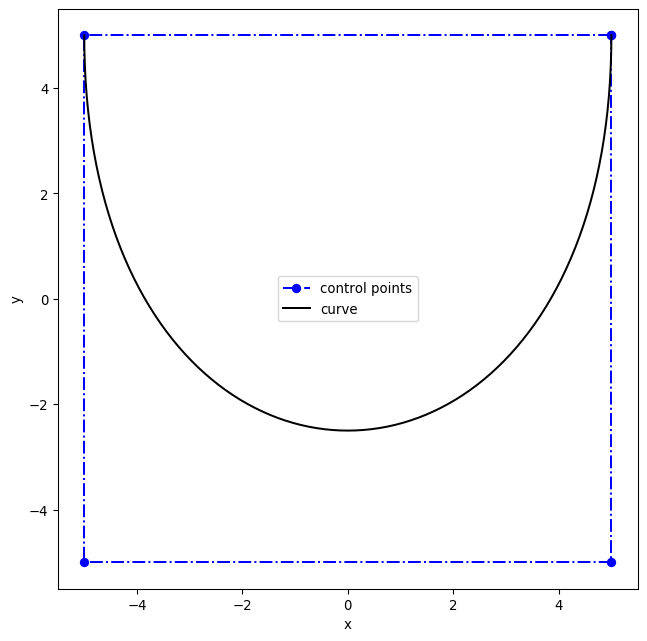

In [24]:
crv = NURBS.Curve()
crv.degree = 3
crv.ctrlptsw = [[5, 5, 0, 1], [-5, 5, 0, 1], [-5, -5, 10, 1], [5, -5, 0, 1], [5, 5, 0, 1]]
crv.knotvector = [0, 0, 0, 0, 0, 1, 1, 1, 1]

crv.vis = VisMPL.VisCurve2D()
crv.render()

NURBS_points = [list_to_CGA(crv.evalpts[i]) for i,j in enumerate(crv.evalpts)]
NURBS_pp_list = [NURBS_points[i]^NURBS_points[i+1] for i in range(len(crv.evalpts)-1)]

In [9]:
X1 = up(-5*e1 + 5*e2)
Sp1 = (X1 - 0.5*einf)*I5
Pl1 = (-e2 -5*einf)*I5
Ci1 = meet(Sp1,Pl1)

X2 = up(-5*e1 - 5*e2)
Sp2 = (X2 - 0.5*einf)*I5
Pl2 = (0.707*e1 - 0.707*e2 + 0*einf)*I5
Ci2 = meet(Sp2,Pl2)

X3 = up(5*e1 - 5*e2)
Sp3 = (X3 - 0.5*einf)*I5
Pl3 = (0.707*e1 + 0.707*e2 + 0*einf)*I5
Ci3 = meet(Sp3,Pl3)

X4 = up(5*e1 + 5*e2)
Sp4 = (X4 - 0.5*einf)*I5
Pl4 = (+e2 +5*einf)*I5
Ci4 = meet(Sp4,Pl4)

circle_list = [average_objects([Ci1,Ci2,Ci3,Ci4], [Bc0[i],Bc1[i],Bc2[i], Bc3[i]]) for i in range(101)]


centre_list = [normalise_n_minus_1((C*einf*C)(1)) for C in circle_list]

centre_pp_list = [centre_list[i]^centre_list[i+1] for i in range(100)]

C:\Users\Cactus\Anaconda3\envs\F-JL-3\lib\site-packages\numba\ir_utils.py:2030: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'gradeList' of function 'grade_obj_func'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "..\..\..\..\..\..\Anaconda3\envs\F-JL-3\lib\site-packages\clifford-1.0.5-py3.7.egg\clifford\__init__.py", line 282:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [15]:
X1 = up(-5*e1 + 5*e2)
Sp1 = (X1 - 0.5*einf)*I5
Pl1 = (-e2 -5*einf)*I5
Ci1 = meet(Sp1,Pl1)

X2 = up(-5*e1 - 5*e2)
Sp2 = (X2 - 0.5*einf)*I5
Pl2 = (0.707*e1 - 0.707*e2 + 0*einf)*I5
Ci2 = meet(Sp2,Pl2)

X3 = up(5*e1 - 5*e2)
Sp3 = (X3 - 0.5*einf)*I5
Pl3 = (0.707*e1 + 0.707*e2 + 0*einf)*I5
Ci3 = meet(Sp3,Pl3)

X4 = up(5*e1 + 5*e2)
Sp4 = (X4 - 0.5*einf)*I5
Pl4 = (+e2 +5*einf)*I5
Ci4 = meet(Sp4,Pl4)

circle_list = [average_objects([Ci1,Ci2,Ci3,Ci4], [Bc0[i],Bc1[i],Bc2[i], Bc3[i]]) for i in range(101)]


centre_list = [normalise_n_minus_1((C*einf*C)(1)) for C in circle_list]

centre_pp_list = [centre_list[i]^centre_list[i+1] for i in range(100)]

In [16]:
sc = GanjaScene()

sc.add_objects([o(2).normal().clean(1E-4) for o in NURBS_pp_list], color.Color.RED)
sc.add_objects([o(2).normal().clean(1E-4) for o in centre_pp_list], color.Color.BLACK)
sc.add_objects([Ci1,Ci2,Ci3,Ci4])
#sc.add_objects([o(3).normal().clean(1E-4) for o in circle_list], color.Color.BLACK)

draw(sc, 
    static=False , 
    scale=0.1)

<IPython.core.display.Javascript object>